Problem 1. 
The dataset GPA-GRE contains  16 years of GPA, Verbal and Quantitative GRE 
scores for graduate students. 

In [1]:
# File Paths
gpa_gre = "gpa-gre.csv"
dwell_time = "data/multiple-sites.tsv"

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import scipy.stats

In [3]:
try:
    gpa_gre = pd.read_csv(gpa_gre, error_bad_lines = False, warn_bad_lines=False)
except Exception as e:
    print("Error in File : "+ gpa_gre)
    print(e)
    
gpa_gre.dropna(subset=['GPA','Verbal', 'Quant'], inplace = True)
gpa_gre['Combined_Gre'] = gpa_gre.apply(lambda row: row['Verbal'] + row['Quant'], axis=1)


a. Use linear regression with the combined GRE score (Verbal + Quantitive) as the independent variable 
and the GPA as the dependent variable to create a model that predicts a students GPA given their combined GRE score. 


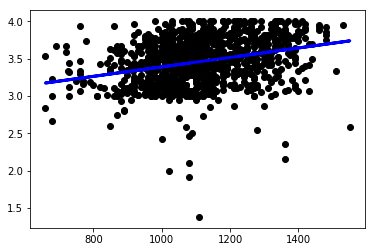

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

X = gpa_gre[['Combined_Gre']]
y = gpa_gre['GPA']

model_2 = LinearRegression(fit_intercept=True)

model_2.fit(X, y)

y_pred = model_2.predict(X)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.show()

In [5]:
ynew2 = model_2.predict([[700]])
ynew2

array([3.19860113])

b. What is the r2 score of the model?

In [6]:
print('R2 score: %f' % r2_score(y, y_pred))

R2 score: 0.086056


In [7]:
pearson_coff = scipy.stats.pearsonr(y, y_pred)
print('R2 = r2 (Pearson’s Correlation squared) : %f' % (pearson_coff[0] * pearson_coff[0]))

R2 = r2 (Pearson’s Correlation squared) : 0.086056


c. Plot the residuals of the data from the model

Residual:



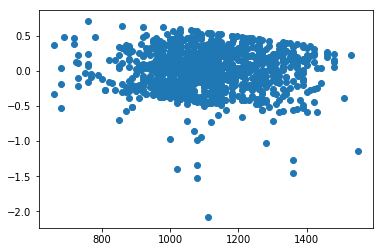

In [8]:
residual = y - y_pred 
print("Residual:\n")
plt.scatter(X,residual)

Problem 2. 
 In the dataset dwell data there is a file multiple-site.tsv. The file contains two columns: a site number and dwell-time on that site. Each site contains multiple entires.

a. Using scikitlearn compute the mean and standard deviation of the dwell time per site.

In [9]:
dwell_time_df = pd.read_csv(dwell_time, sep='\t')
dwell_time_df.dropna(subset=['site','dwell-time'], inplace = True)
dwell_time_df.head()


,site,dwell-time
0,13,28
1,6,33
2,17,81
3,1,67
4,16,87


In [10]:
print("Mean of the dwell time per site")
dwell_time_df.groupby('site').mean()

Mean of the dwell time per site


,dwell-time
site,
0,79.851064
1,106.000000
2,88.229167
3,97.479167
4,94.333333
5,102.333333
6,144.192982
7,123.367347
8,94.346939


In [11]:
print("Standard deviation of the dwell time per site")
dwell_time_df.groupby('site').std()

Standard deviation of the dwell time per site


,dwell-time
site,
0,79.135266
1,103.790126
2,88.709001
3,74.814093
4,77.725843
5,87.700618
6,146.930917
7,117.025584
8,97.564626


b. Using Spark (not scikitlearn) compute the mean and standard deviation of the dwell time per 
site.

In [12]:
import pyspark.sql as sql
import pyspark.sql.functions as fn

spark = sql.SparkSession.builder \
.master("local[*]") \
.appName("Dwell Time") \
.getOrCreate()

dwell_time_df_spark = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load(dwell_time)

dwell_time_grouped = dwell_time_df_spark.groupBy("site")\
                .agg(fn.mean("dwell-time").alias("Average"), \
                fn.stddev("dwell-time").alias("Standard Deviation"))
dwell_time_grouped.show()

+----+------------------+------------------+
|site|           Average|Standard Deviation|
+----+------------------+------------------+
|   7|123.36734693877551|117.02558371953526|
|  15|119.34782608695652|107.02050009046641|
|  11| 96.98214285714286| 78.94635487501591|
|   3| 97.47916666666667|  74.8140928763278|
|   8| 94.34693877551021| 97.56462623572646|
|  16| 86.74418604651163|118.83523868570455|
|   0| 79.85106382978724| 79.13526634363751|
|   5|102.33333333333333|  87.7006178654617|
|  18| 94.81481481481481| 81.65760870487834|
|  17|  77.8913043478261| 83.41388860132467|
|   6|144.19298245614036|146.93091654103628|
|  19| 89.28070175438596| 93.71056396959068|
|   9|             89.82|100.47046271193848|
|   1|             106.0|103.79012594607659|
|  10|129.95238095238096| 90.10940569215181|
|   4| 94.33333333333333| 77.72584297816697|
|  12| 80.95081967213115| 68.98729985282513|
|  13| 90.73770491803279|102.01387187360751|
|  14| 74.76470588235294| 78.26278508596386|
|   2| 88.